In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from plotly.subplots import make_subplots

# Variables

battery_power: Total energy a battery can store in one time measured in mAh.

blue: Has bluetooth or not.

clock_speed: speed at which microprocessor executes instructions.

dual_sim: Has dual sim support or not.

fc: Front Camera mega pixels.

four_g: Has 4G or not.

int_memory: Internal Memory in Gigabytes.

m_dep: Mobile Depth in cm.

mobile_wt: Weight of mobile phone.

n_cores: Number of cores of processor.

pc: Primary Camera mega pixels.

px_height: Pixel Resolution Height.

px_width: Pixel Resolution Width.

ram: Random Access Memory in Mega Byte.

sc_h: Screen Height of mobile in cm.

sc_w: Screen Width of mobile in cm.

talk_time: longest time that a single battery charge will last when you are.

three_g: Has 3G or not.

touch_screen: Has touch screen or not.

wifi: Has wifi or not.

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Dataset found at : https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [12]:
df=pd.read_csv(r'C:\Users\yugsi\Desktop\train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# EDA

<AxesSubplot:>

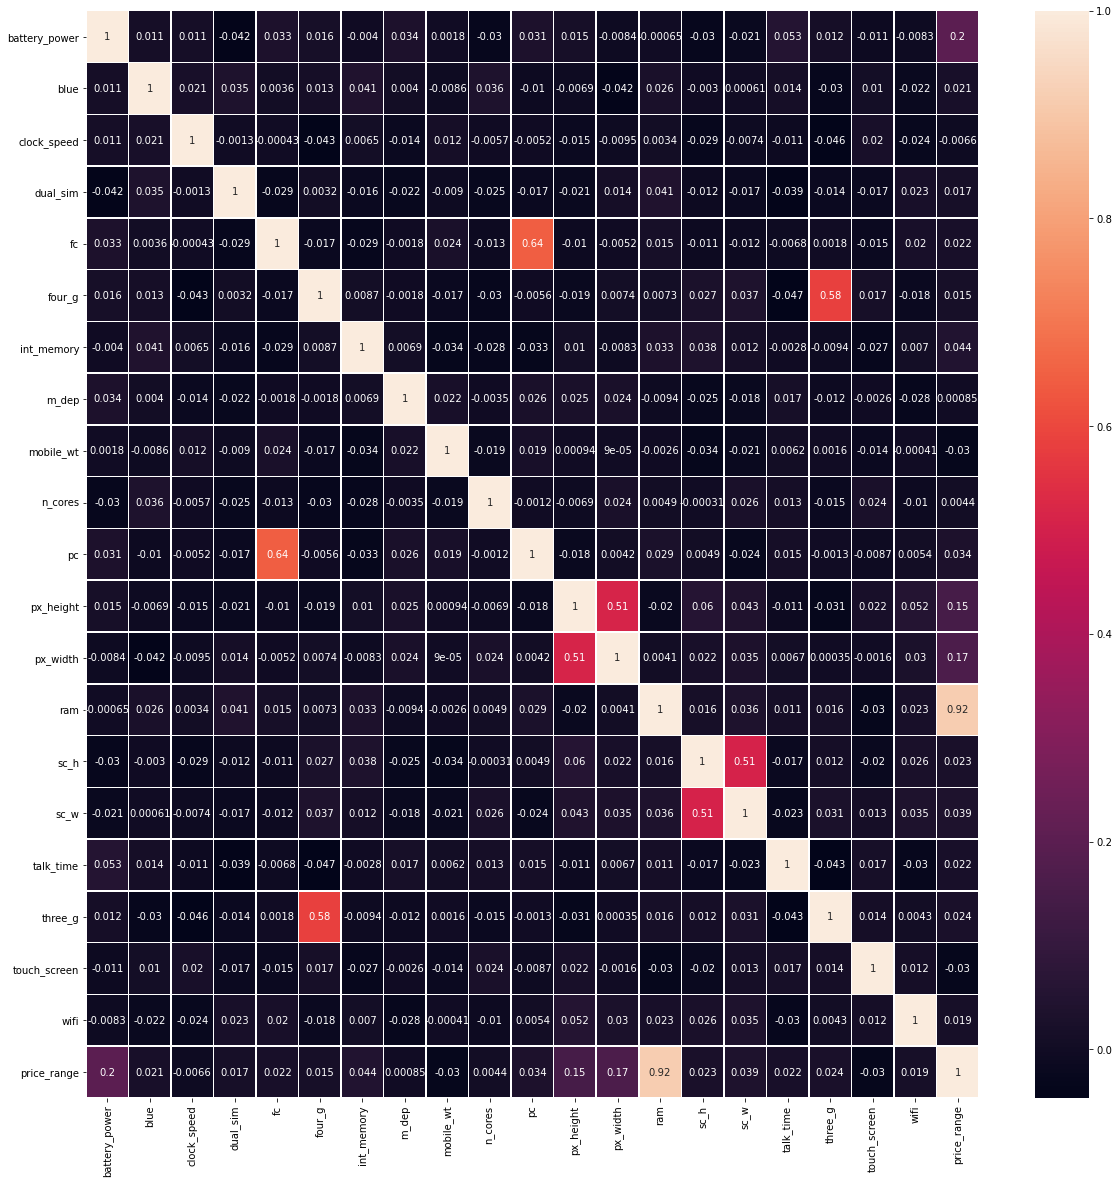

In [13]:
c=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(c,annot=True,linewidth=0.5)


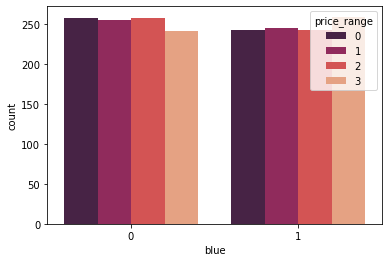

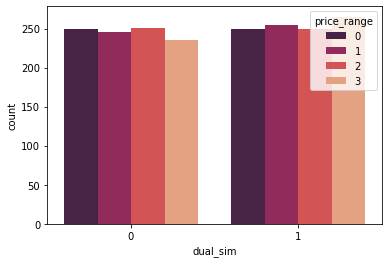

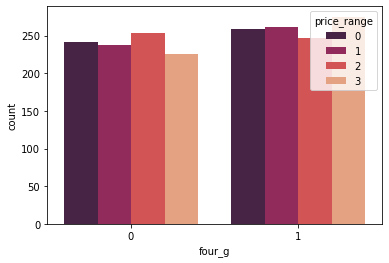

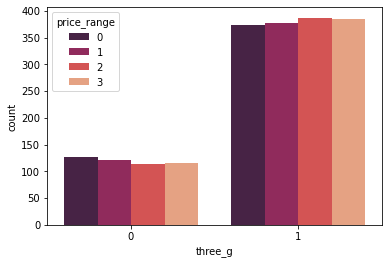

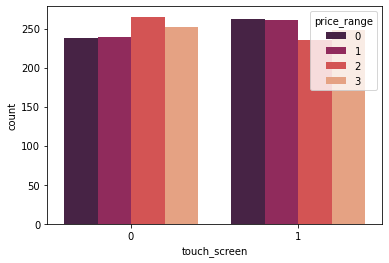

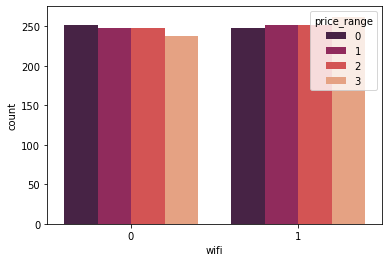

In [54]:
binary_col = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
for i in binary_col:
    ax = sns.countplot(x=i, hue='price_range',data=df,palette='rocket')
    plt.show()

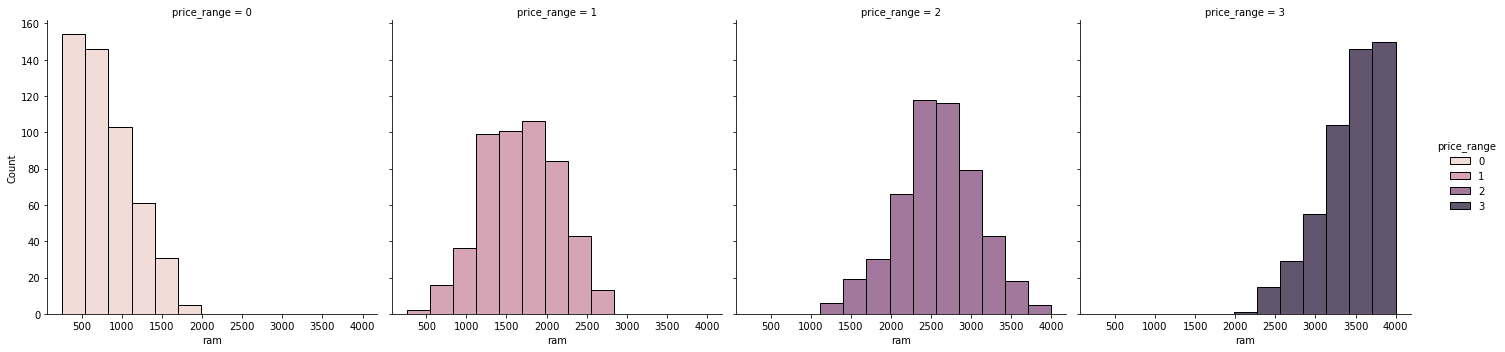

In [55]:
sns.displot(data=df, x="ram", hue="price_range", col="price_range")
plt.show()

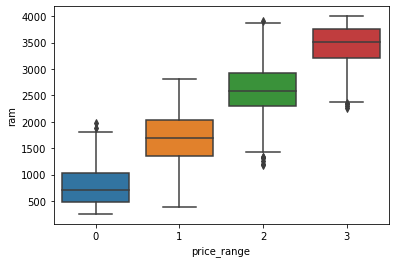

In [56]:
sns.boxplot(x='price_range',y='ram',data=df)
plt.show()

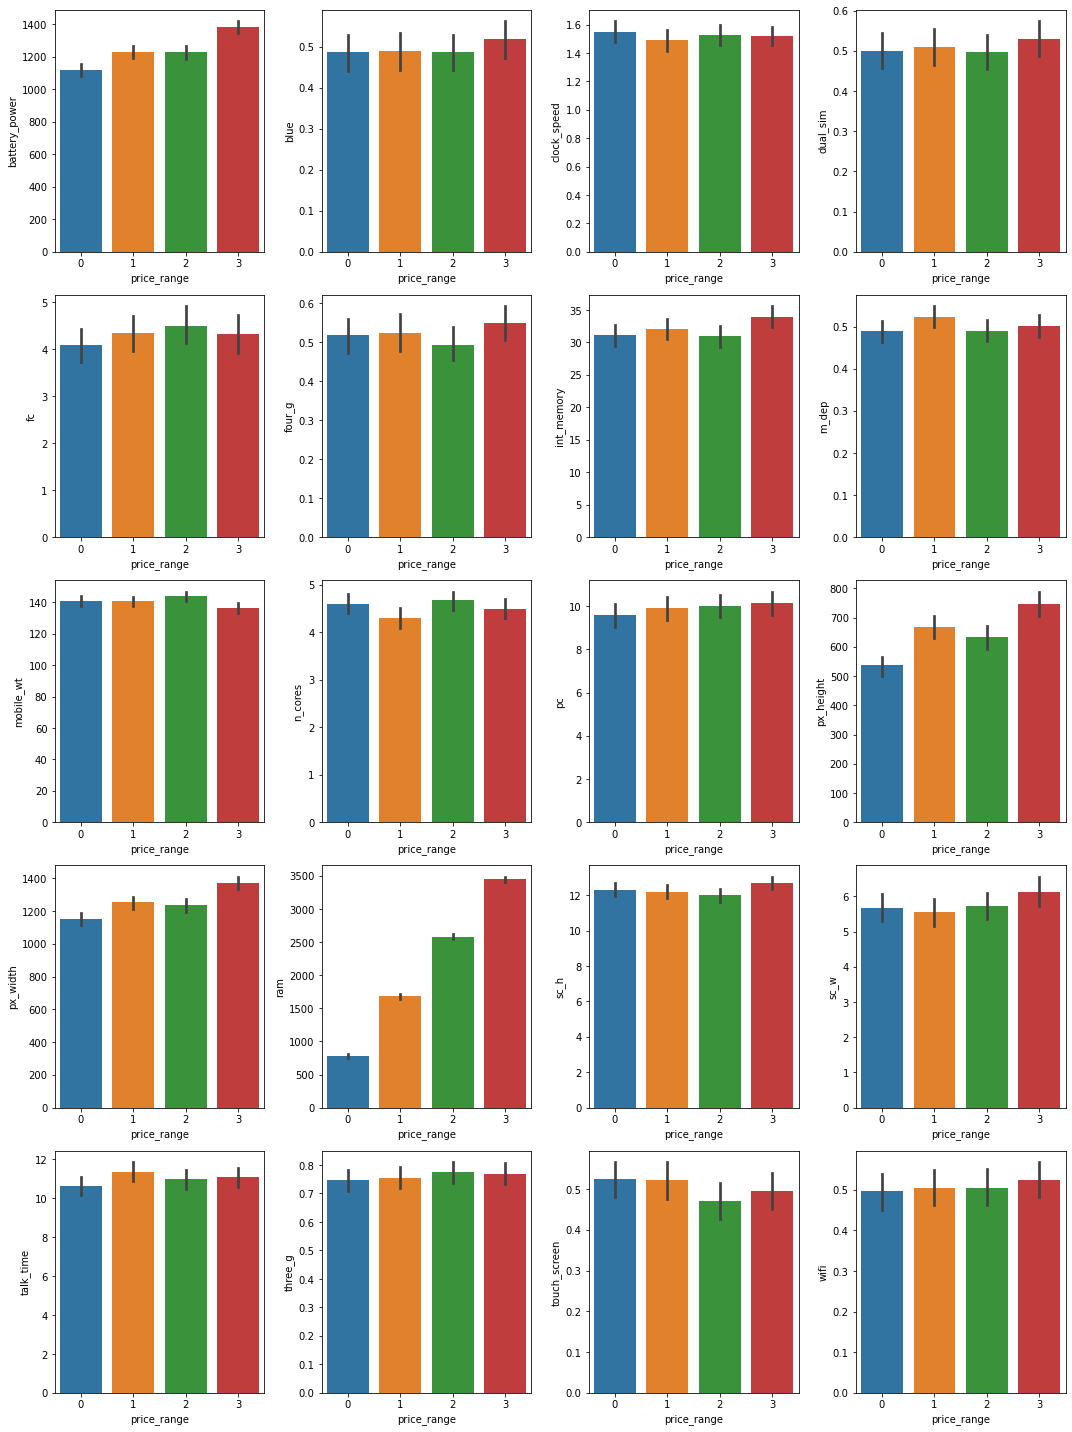

In [64]:
l=df.drop('price_range',axis=1).columns
p=0
fig,ax=plt.subplots(5,4,figsize=(15,20))
for i in range (5):
    for j in range (4) :
        
        
        sns.barplot(x=df['price_range'],y=df[l[p]],ax=ax[i][j])
        p=p+1
        

plt.tight_layout()

In [93]:
x=df['price_range'].value_counts()
x

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

([<matplotlib.patches.Wedge at 0x2b918c35fd0>,
 [Text(-0.7778174593052025, -0.7778174593052023, 'low'),
  Text(0.7778174593052022, -0.7778174593052025, 'medium'),
  Text(0.7778174593052025, 0.7778174593052022, 'high'),
  Text(-0.7778174593052014, 0.7778174593052033, 'very high')],
 [Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%'),
  Text(0.4242640687119286, 0.4242640687119284, '25.0%'),
  Text(-0.424264068711928, 0.424264068711929, '25.0%')])

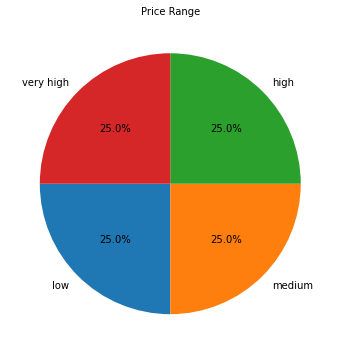

In [92]:
plt.figure(figsize=(10,6))
plt.title('Price Range',size=10)
plt.pie(x,labels=['low','medium','high','very high'],autopct='%1.1f%%',startangle=180)

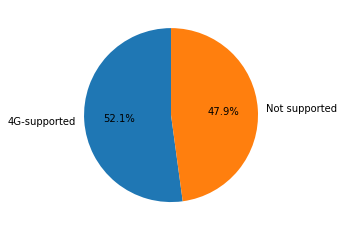

In [87]:
fig1, ax1 = plt.subplots()
columns =["4G-supported",'Not supported']
ax1.pie(df.four_g.value_counts().values, labels=columns, autopct='%1.1f%%', startangle=90)
plt.show()

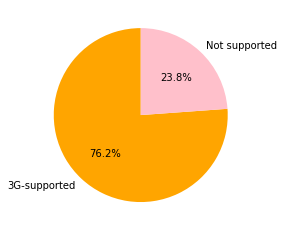

In [90]:
fig2, ax1 = plt.subplots()
columns =["3G-supported",'Not supported']
colors = ['orange', 'pink']
ax1.pie(df.three_g.value_counts().values, labels=columns, autopct='%1.1f%%', startangle=90,colors=colors)
plt.show()

In [109]:
x=df.drop(['price_range'],axis=1)
y=df['price_range']


0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# SVM Model

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

In [96]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [98]:
svc.score(X_test,y_test)

0.96

In [99]:
svc.score(X_train,y_train)

0.9457142857142857

In [100]:
y_pred=svc.predict(X_test)

In [193]:
m=cm(y_test,y_pred)



In [194]:
df1=pd.DataFrame(m,index=['Low','Medium','High','Very High'],columns=['Low','Medium','High','Very High'])
df1

,Low,Medium,High,Very High
Low,148,3,0,0
Medium,5,143,6,0
High,0,3,138,7
Very High,0,0,0,147


Text(33.0, 0.5, 'Actual')

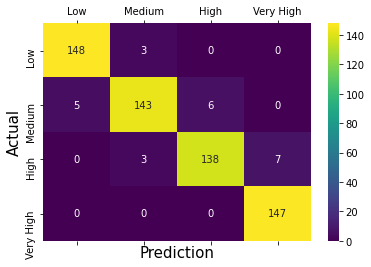

In [200]:
sns.heatmap(df1,cmap='viridis',annot=True,fmt='g')
plt.tick_params(labelbottom=False,top=True,labeltop=True)
plt.xlabel('Prediction',size=15)
plt.ylabel('Actual',size=15)